In [102]:
import numpy as np
import scipy.stats as stat
import plotly.express as px
import plotly.graph_objects as go

In [233]:
def P(x):
    return stat.norm.pdf(x, loc=5, scale=2)

def add_state(x):
    global states
    states.append(x)
    return x

def sample() -> float:
    global states
    global x0
    xt = np.random.uniform(-100,100)
    alpha = P(xt)/P(x0)
    if alpha > 1:
        x0 = add_state(xt)
    else:
        if np.random.rand() < alpha:
            x0 = add_state(xt)
        else:
            sample()
            
x0 = 0
#warm up
states = []
for x in range(500):
    sample()
    
states = []
for x in range(5000):
    sample()

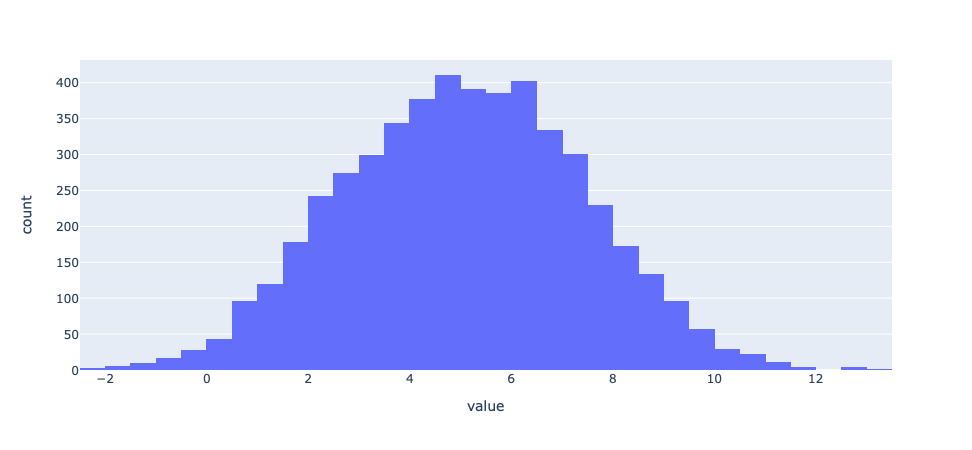

In [234]:
fig = px.histogram(states, nbins=50)
fig.update_layout(showlegend=False)

In [203]:
N = []
nl = 3

def P(x, m, std):
    m = m+2
    #return stat.norm.pmf(x, loc=m, scale=std)
    return stat.nbinom.pmf(x, n=m/(m-1), p=1/m)

def sample():
    global x0
    global x00
    m = x0 + 2
    n = m/(m-1)
    p = 1/m
    xt = np.random.negative_binomial(n,p)
    
    alpha = P(xt, x0, None)/P(x0, x00, None)
    if alpha > 1:
        x00 = x0
        x0 = xt
    else:
        if np.random.rand() < alpha:
            x00 = x0
            x0 = xt
        else:
            sample()
    
N_points = 10000
for n in range(N_points):
    if n %(N_points/10)==0:
        print(n)
    x0 = 0
    x00 = 0
    for l in range(19):
        sample()
    N.append(round(x0, 0))
N = np.array(N)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


<ipython-input-228-48ef190dd4c5>:9: RuntimeWarning:

divide by zero encountered in true_divide



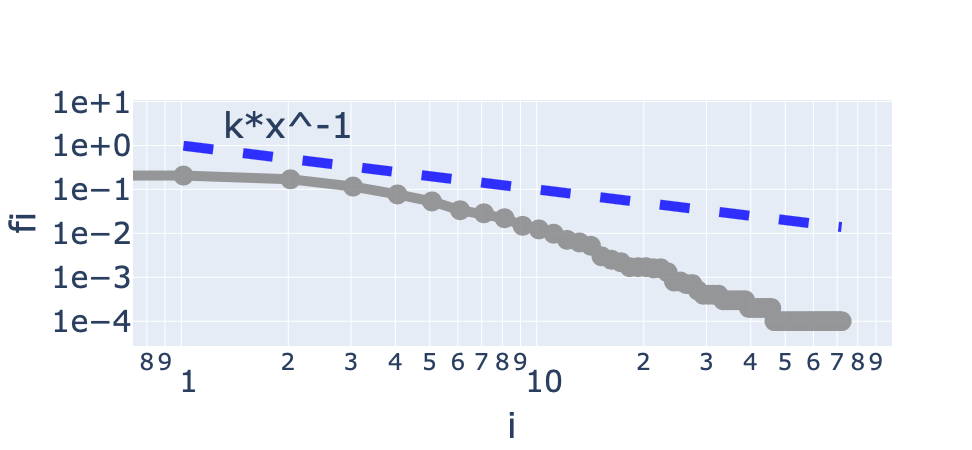

In [228]:
freq = np.unique(N, return_counts=True)[1]
freq = freq[freq>0]
freq = np.sort(freq)[::-1]/np.sum(freq)

x = np.linspace(0, len(freq), len(freq))

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=freq, mode="lines+markers", marker=dict(size=20), line=dict(width=10, color="gray")))
fig.add_trace(go.Scatter(x=x, y=1/x, mode="lines", line=dict(width=10, color="blue", dash="dash"), name="1/x"))

fig.add_annotation(xref="x", x=0.3, y=0.5, text="k*x^-1",showarrow=False, font_size=35)

fig.update_layout(showlegend=False,
                  xaxis=dict(title_text="i", title_font_size=35, type="log", tickfont_size=30),
                 yaxis=dict(title_text="fi", title_font_size=35, type="log", tickfont_size=30, tickformat="e"))
fig.update_traces(opacity=0.8)

fig.show()
#fig.write_image("mcmc_zipf.pdf")

<ipython-input-224-16257015a7d2>:7: RuntimeWarning:

divide by zero encountered in true_divide



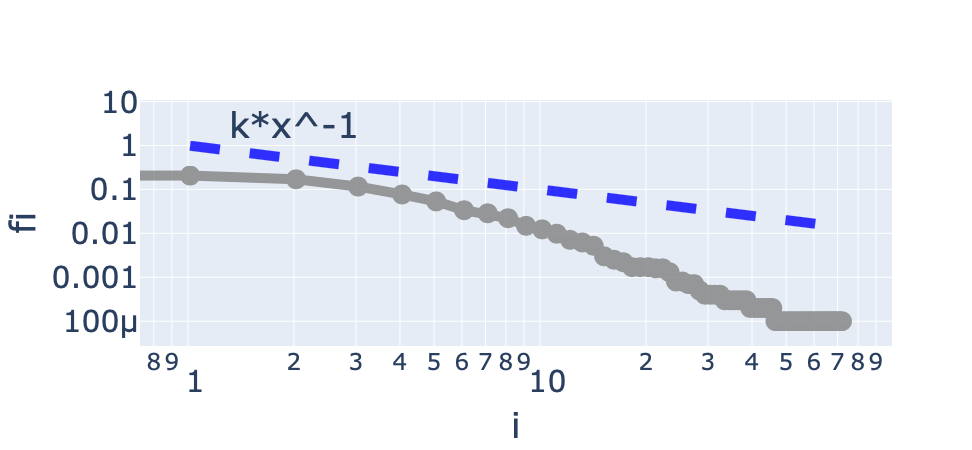

In [224]:
freq = np.histogram(N, bins=500)[0]
freq = freq[freq>0]
freq = np.sort(freq)[::-1]/np.sum(freq)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=freq, mode="lines+markers", marker=dict(size=20), line=dict(width=10, color="gray")))
fig.add_trace(go.Scatter(x=x, y=1/x, mode="lines", line=dict(width=10, color="blue", dash="dash"), name="1/x"))

fig.add_annotation(xref="x", x=0.3, y=0.5, text="k*x^-1",showarrow=False, font_size=35)

fig.update_layout(showlegend=False,
                  xaxis=dict(title_text="i", title_font_size=35, tickfont_size=30, type="log"),
                 yaxis=dict(title_text="fi", title_font_size=35,tickfont_size=30, type="log"))
fig.update_traces(opacity=0.8)

fig.show()

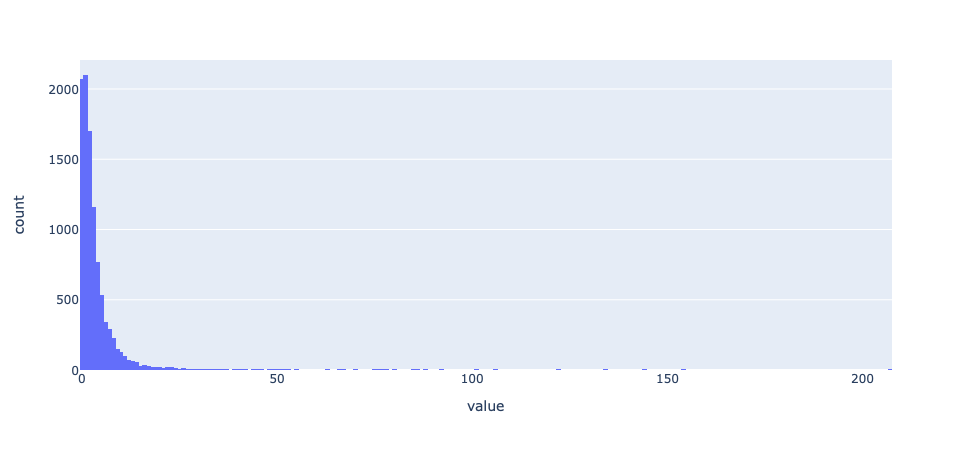

In [213]:
fig = px.histogram(N)
fig.update_layout(showlegend=False)